# 激活函数、损失函数、优化器及数据加载

### Sigmoid

In [1]:
# sigmod激活函数表达式
# y = 1/(1+e^(-x))
# y'= y*(1-y)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


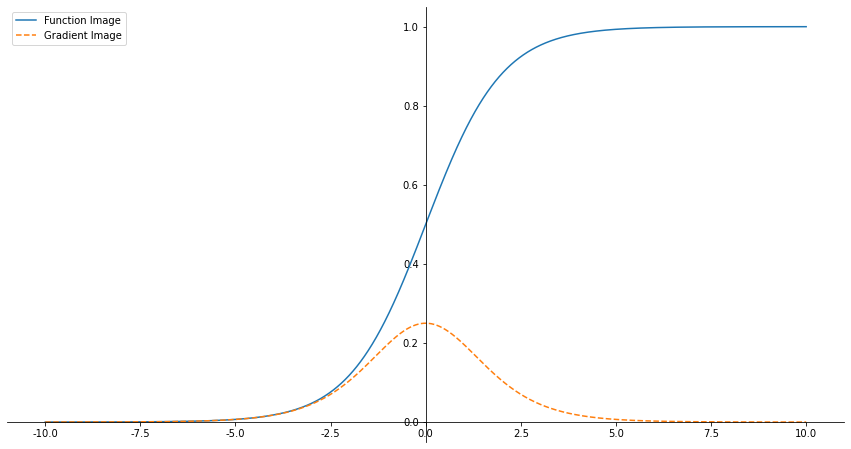

In [2]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import math


%matplotlib inline
plt.figure(figsize=(15, 8))

# 指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
# 解决负号“-”显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
ax = plt.gca()  # get current axis 获得坐标轴对象

# 将右边、上边这两条边颜色设置为空 其实就相当于抹掉这两条边
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 指定下边作为x轴，指定左边作为y轴
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 指定data设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

x = torch.linspace(-10, 10, 5000)
xx = 1 / (1 + torch.pow(math.e, -x))

# 函数图像
l1, = plt.plot(x.numpy(), xx.numpy())
# 导数图像
l2, = plt.plot(x.numpy(), (xx*(1-xx)).numpy(), "--")

plt.legend(handles=[l1, l2], labels=["Function Image", "Gradient Image"])
plt.show()

In [3]:
a = torch.Tensor([-1, 0, 1])
print(a)
print(torch.sigmoid(a))
print(a.sigmoid())

tensor([-1.,  0.,  1.])
tensor([0.2689, 0.5000, 0.7311])
tensor([0.2689, 0.5000, 0.7311])


### Tanh

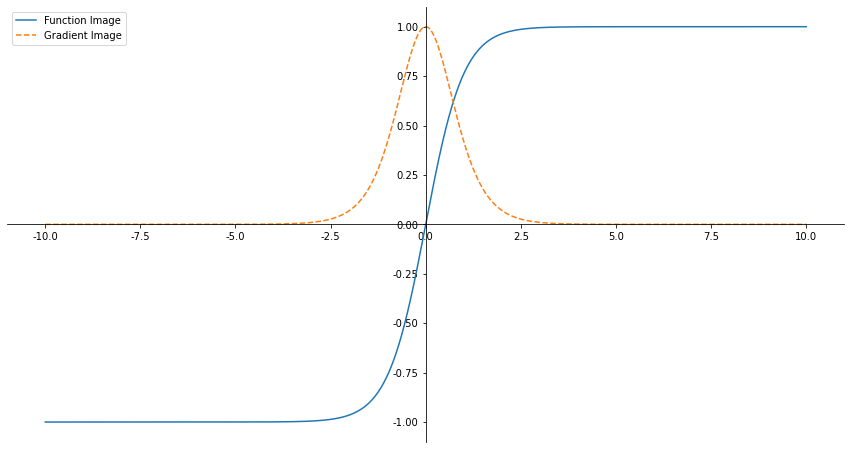

In [4]:
# tanh激活函数表达式
# tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
# f'(x) = 1 - f(x)^2
plt.figure(figsize=(15,8))
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
ax = plt.gca() # get current axis 获得坐标轴对象
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') # 将右边上边的两条边颜色设置为空 其实就相当于抹掉这两条边
ax.xaxis.set_ticks_position('bottom')   
ax.yaxis.set_ticks_position('left')# 指定下边的边作为 x 轴 指定左边的边为 y 轴
ax.spines['bottom'].set_position(('data', 0))  #指定data 设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['left'].set_position(('data', 0))
x = torch.linspace(-10, 10, 5000)
xx = (math.e**x - math.e**(-x)) / (math.e**x + math.e**(-x))
# 函数图像
l1, = plt.plot(x.numpy(), xx.numpy())
# 导数图像
l2, = plt.plot(x.numpy(), (1-xx**2).numpy(), "--")
plt.legend(handles=[l1, l2], labels=["Function Image", "Gradient Image"])
plt.show()

In [5]:
a = torch.Tensor([-1, 0, 1])
print(a)
print(torch.tanh(a))
print(a.tanh())

tensor([-1.,  0.,  1.])
tensor([-0.7616,  0.0000,  0.7616])
tensor([-0.7616,  0.0000,  0.7616])


### ReLU及其变形

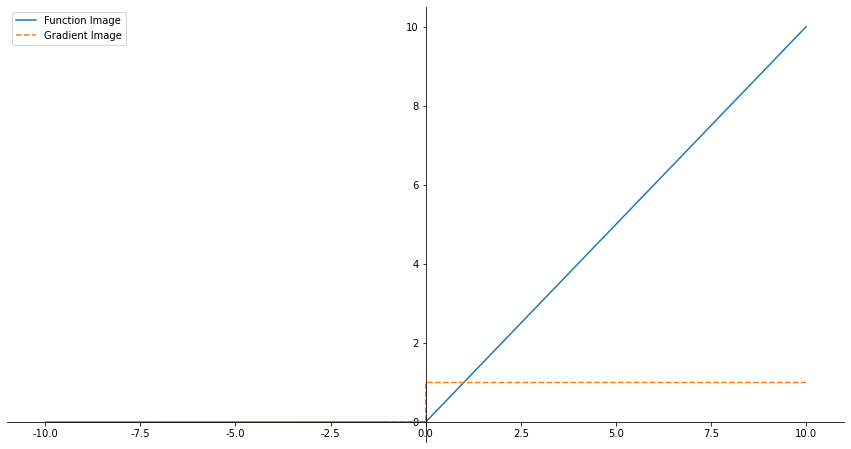

In [6]:
# ReLU激活函数表达式
# ReLU(x) = max(0, x)
# ReLU'(x) = dout(self.mask)
plt.figure(figsize=(15,8))
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
ax = plt.gca() # get current axis 获得坐标轴对象
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') # 将右边上边的两条边颜色设置为空 其实就相当于抹掉这两条边
ax.xaxis.set_ticks_position('bottom')   
ax.yaxis.set_ticks_position('left')# 指定下边的边作为 x 轴 指定左边的边为 y 轴
ax.spines['bottom'].set_position(('data', 0))  #指定data 设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['left'].set_position(('data', 0))
x = torch.linspace(-10, 10, 5000)
xx = torch.max(torch.Tensor([0]), x)
xx_d = torch.gt(x, torch.Tensor([0]))
# 函数图像
l1, = plt.plot(x.numpy(), xx.numpy())
# 导数图像
l2, = plt.plot(x.numpy(), xx_d.numpy(), "--")
plt.legend(handles=[l1, l2], labels=["Function Image", "Gradient Image"])
plt.show()

In [7]:
a = torch.Tensor([-1, 0, 1])
print(a)
print(torch.relu(a))
print(a.relu())

tensor([-1.,  0.,  1.])
tensor([0., 0., 1.])
tensor([0., 0., 1.])


### L1范数损失

In [8]:
import torch.nn as nn


# L1范数损失
x = torch.Tensor([1, 2, 3])
target = torch.Tensor([2, 2, 3])
criterion = nn.L1Loss()
loss = criterion(x, target)
print(loss.item())

0.3333333432674408


In [9]:
# SmoothL1Loss
x = torch.Tensor([1, 2.1, 3])
target = torch.Tensor([2, 2, 3])
criterion = nn.SmoothL1Loss()
loss = criterion(x, target)
print(loss.item())

0.16833333671092987


### 均方误差损失

In [10]:
x = torch.Tensor([1, 2.1, 3])
target = torch.Tensor([2, 2, 3])
criterion = nn.MSELoss()
loss = criterion(x, target)
print(loss.item())

0.33666667342185974


### 二分类交叉熵损失

In [11]:
target = torch.Tensor([0, 0, 1, 1, 0, 1])
predict = torch.Tensor([0.3, 0.2, 0.8, 0.9, 0.1, 0.95])
criterion = nn.BCELoss()
loss = criterion(predict, target)
print(loss.item())
# 二分类交叉熵有一个变形，叫作BCEWithLogitsLoss，其将Sigmoid集成进来。与单独使用Sigmoid和BCELoss函数相比，在数值上更加稳定
# 也就是说网络结构中的最后（单个神经元）的输出层不作Sigmoid激活，损失函数直接使用torch.nn.BCEWithLogitsLoss

0.1774960607290268


### CrossEntropyLoss和NLLLoss计算交叉熵损失

In [12]:
# CrossEntropyLoss（如果输出层不做任何激活的话）
predict = torch.Tensor([[0.1, 0.5, 0.4], [0.1, 0.1, 0.8]])
label = torch.LongTensor([1, 2])
loss = nn.CrossEntropyLoss(reduction='none')
print(loss(predict, label))
loss = nn.CrossEntropyLoss(reduction='mean')
print(loss(predict, label))
loss = nn.CrossEntropyLoss(reduction='sum')
print(loss(predict, label))

tensor([0.9459, 0.6897])
tensor(0.8178)
tensor(1.6356)


In [13]:
import torch.nn.functional as F


# softmax/log/nll_loss
predict = torch.Tensor([[0.1, 0.5, 0.4], [0.1, 0.1, 0.8]])
label = torch.LongTensor([1, 2])
softmax = torch.softmax(predict, dim=1)
print("step1 softmax: {}".format(softmax))
_log = torch.log(softmax)
print("step2 log: {}".format(_log))
nll_loss = F.nll_loss(_log, label)
print("step3 nll_loss: {}".format(nll_loss))

step1 softmax: tensor([[0.2603, 0.3883, 0.3514],
        [0.2491, 0.2491, 0.5017]])
step2 log: tensor([[-1.3459, -0.9459, -1.0459],
        [-1.3897, -1.3897, -0.6897]])
step3 nll_loss: 0.8178186416625977


### KL散度损失

In [14]:
import math


# KLDivLoss用于衡量预测分布与真实分布的偏离程度
predict = torch.Tensor([0.1, 0.5, 0.4])  # 预测输出分布对应的概率
label = torch.Tensor([0.4, 0.5, 0.1])  # 真实分布对应的概率
loss = nn.KLDivLoss(reduction='batchmean')
print(loss(predict, label).item())
# PyTorch在计算过程中要求输入值是经过log计算的，即需要用log(q(xi))来计算对数概率，PyTorch默认会对结果取均值
# 损失的计算过程为：
Loss = (0.4*(math.log(0.4)-0.1) + 0.5*(math.log(0.5)-0.5) + 0.1*(math.log(0.1)-0.4))/(3*1)
print(Loss)

-0.42444947361946106
-0.4244494641096797


### 余弦相似度损失

In [15]:
# CosineEmbeddingLoss 按照dim=0的维度来计算余弦相似度，按照dim=1的维度来取平均值
x = torch.Tensor([[0.1, 0.5, 0.4], [0.1, 0.5, 0.4]])
y = torch.Tensor([[0.4, 0.5, 0.1], [0.1, 0.5, 0.4]])
label = torch.Tensor([-1, 1])
loss = nn.CosineEmbeddingLoss()
print(loss(x, y, label).item())
print(torch.cosine_similarity(x, y))
# 余弦相似度(就是指两个向量夹角的余弦值: -1~1)计算公式
# label=1: 1-cos(x, y)
# label=-1: max(0, cos(x, y) + margin)

0.3928571045398712
tensor([0.7857, 1.0000])


### 多分类多标签损失

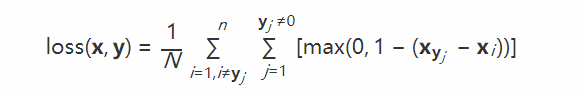

In [16]:
# MultiLabelMarginLoss
from IPython.display import Image

Image("./1.png")

In [17]:
loss = torch.nn.MultiLabelMarginLoss()
x = torch.FloatTensor([[0.1, 0.2, 0.4, 0.8, 1.1, 4, 7]])
y = torch.LongTensor([[5, 4, 3, 0, -1, 1, 2]])  # 该分类中有7种不同的标签，例如（夏装,女裙,少女裙,...,半身裙）
loss(x, y).item()

4.257142543792725

In [18]:
# 5, 4, 3, 0为正确类别索引；1, 2, 6为错误类别索引
#（x_{yj} - x_{i}表示用正确类别索引值（4，1.1，0.8，0.1）减去错误类别索引值（0.2，0.4，7））
(max(0, (1-(4-0.2))) + max(0, (1-(1.1-0.2))) + max(0, (1-(0.8-0.2))) + max(0, (1-(0.1-0.2))) + 
 max(0, (1-(4-0.4))) + max(0, (1-(1.1-0.4))) + max(0, (1-(0.8-0.4))) + max(0, (1-(0.1-0.4))) + 
 max(0, (1-(4-7))) + max(0, (1-(1.1-7))) + max(0, (1-(0.8-7))) + max(0, (1-(0.1-7)))) / 7

4.257142857142857

## 优化器

### BGD

### SGD

### MBGD

## 数据加载

### Dataset数据集

In [19]:
import pandas as pd
from torch.utils.data import Dataset


df = pd.read_csv("./salarys.csv", encoding='utf8')


def z_score(series):
    # 计算均值
    _mean = series.sum() / series.count()
    print("mean: {}".format(_mean))
    # 计算标准差
    std = (((series - _mean) ** 2).sum() / (series.count() - 1)) ** 0.5
    print("std: {}".format(std))
    new_series = (series - _mean) / std
    return new_series


def transform(data, zy_list, wd_list, jd_list, sf_list, xl_list, columns):
    # print(columns)
    zy_index = columns.index('专业编码')
    wd_index = columns.index('纬度')
    jd_index = columns.index('经度')
    sf_index = columns.index('省份编码')
    xl_index = columns.index('学历编码')
    result = []
    for column in columns:
        idx = columns.index(column)
        if idx in [zy_index, wd_index, jd_index, sf_index, xl_index]:
            if idx == zy_index:
                t = [0] * len(zy_list)
                t[zy_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == wd_index:
                t = [0] * len(wd_list)
                t[wd_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == jd_index:
                t = [0] * len(jd_list)
                t[jd_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == sf_index:
                t = [0] * len(sf_list)
                t[sf_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == xl_index:
                t = [0] * len(xl_list)
                t[xl_list.index(data[idx])] = 1
                result.extend(t)
        else:
            result.append(data[idx])
    return torch.tensor(result)


class CustomDataset(Dataset):
    def __init__(self, csv_path, transform=transform):
        self.transform = transform
        df = pd.read_csv(csv_path, encoding='utf8')
        # 纬度有NaN值，采用前向填充
        df = df.fillna(method="ffill")
        del df['专业']
        del df['省份']
        del df['城市']
        # 需要进行One-Hot编码的字段
        self.zy = sorted(set(df["专业编码"].values))
        self.wd = sorted(set(df["纬度"].values))
        self.jd = sorted(set(df["经度"].values))
        self.sf = sorted(set(df["省份编码"].values))
        self.xl = sorted(set(df["学历编码"].values))
        
        self.df_label = df["薪酬"]
        del df["薪酬"]
        # 对”综合能力“做归一化处理
        df["综合能力"] = z_score(df["综合能力"])
        self.df_data = df
        self.columns = self.df_data.columns.tolist()
        
    def __getitem__(self, idx):  # 根据idx取出其中一个
        data = self.df_data.iloc[idx].values
        label = self.df_label.iloc[idx]
        data = transform(data, self.zy, self.wd, self.jd, self.sf, self.xl, self.columns)
        return data, torch.tensor(label)
    
    def __len__(self):
        return df.count()[0]

In [20]:
dataset = CustomDataset("./salarys.csv", transform=transform)

mean: 37.07904970227501
std: 21.75875929994074


In [21]:
len(dataset)

255516

In [22]:
dataset[100]

(tensor([ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  

In [23]:
dataset.df_data.iloc[100]

学历编码      2.000000
专业编码    870.000000
高薪专业      0.000000
热门专业      1.000000
纬度       45.000000
经度      126.000000
专科        1.000000
本科        0.000000
双一流       0.000000
211       0.000000
C9        0.000000
Top2      0.000000
985       0.000000
省份编码     33.000000
综合能力     -1.043588
Name: 100, dtype: float64

In [24]:
sorted(set(df["省份编码"].values))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33]

### Dataloader数据加载器

In [25]:
import numpy as np
import time
from torch.nn import init
from torch.utils.data import DataLoader


class SalaryNet(torch.nn.Module):
    def __init__(self, in_size, h1_size, h2_size, out_size):
        super(SalaryNet,self).__init__()
        self.h1 = torch.nn.Linear(in_size, h1_size)
        self.relu = torch.nn.ReLU()
        self.h2 = torch.nn.Linear(h1_size, h2_size)
        self.out = torch.nn.Linear(h2_size, out_size)
    def forward(self,x):
        h1_relu = self.relu(self.h1(x))
        h2_relu = self.relu(self.h2(h1_relu))
        predict = self.out(h2_relu)
        return predict  


# 训练模型

# 定义批次大小（每次给模型传递16384条记录进行训练，充分利用矩阵计算的并行性能）
batch_size = 16384
# 定义训练epoch
epoch = 5
# 定义模型
model = SalaryNet(327, 100, 20, 1).to("cuda:0")
# 初始化权重参数
for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.xavier_uniform_(layer.weight)
# 定义优化器
optimizer = torch.optim.Adam(model.parameters(), 0.01)
# 定义损失函数
criterion = nn.MSELoss()
# 定义损失数组，用于可视化训练过程
loss_holder = []
# 损失值设置为无限大，每次迭代若损失值比loss_value小则保存模型，并将最新的损失值赋值给loss_value
loss_value = np.inf
step = 0
for i in range(epoch):
    train_count = 0
    batches = 0
    for j in DataLoader(dataset, batch_size=batch_size, shuffle=False):
        batches = batches + 1
        train_x_data = j[0].float().to('cuda:0')
        train_y_data = j[1].float().to("cuda:0")
        # 输出值
        out = model(train_x_data)
        # 损失值
        loss = criterion(out.squeeze(1), train_y_data)
        # 反向传播，先将梯度设置为0，否则该步骤的梯度会和前面已经计算的梯度累乘
        optimizer.zero_grad()
        loss.backward()
        # 更新参数
        optimizer.step()
        # 记录误差
        print('epoch: {}, Train Loss: {:.6f}, Mean: {:.2f}, Min: {:.2f}, Max: {:.2f}, Median: {:.2f}, Dealed/Records: {}/{}, Time: {}'. \
              format(i, math.sqrt(loss / batch_size), out.mean(), out.min(), out.max(), out.median(), batches * batch_size, dataset.__len__(), 
                                                      time.strftime('%Y.%m.%d %H:%M:%S', time.localtime(time.time()))))
        step += 1
        loss_holder.append([step, math.sqrt(loss / batch_size)])
        # 如果模型性能有提升则保存模型，并更新loss_value
        if loss < loss_value:
            torch.save(model, 'model.ckpt')
            loss_value = loss

epoch: 0, Train Loss: 66.857825, Mean: 0.07, Min: -0.38, Max: 0.52, Median: 0.07, Dealed/Records: 16384/255516, Time: 2021.03.30 11:31:00
epoch: 0, Train Loss: 66.132029, Mean: 0.63, Min: 0.17, Max: 1.54, Median: 0.64, Dealed/Records: 32768/255516, Time: 2021.03.30 11:31:05
epoch: 0, Train Loss: 66.586960, Mean: 1.23, Min: 0.55, Max: 3.13, Median: 1.22, Dealed/Records: 49152/255516, Time: 2021.03.30 11:31:09
epoch: 0, Train Loss: 66.632918, Mean: 2.00, Min: 0.97, Max: 5.12, Median: 1.98, Dealed/Records: 65536/255516, Time: 2021.03.30 11:31:14
epoch: 0, Train Loss: 66.937916, Mean: 3.03, Min: 1.47, Max: 7.78, Median: 2.95, Dealed/Records: 81920/255516, Time: 2021.03.30 11:31:18
epoch: 0, Train Loss: 67.043691, Mean: 4.35, Min: 2.17, Max: 11.50, Median: 4.19, Dealed/Records: 98304/255516, Time: 2021.03.30 11:31:23
epoch: 0, Train Loss: 66.304068, Mean: 6.01, Min: 3.07, Max: 16.30, Median: 5.73, Dealed/Records: 114688/255516, Time: 2021.03.30 11:31:27
epoch: 0, Train Loss: 67.192187, Mean

epoch: 3, Train Loss: 44.550555, Mean: 3109.74, Min: 1574.29, Max: 9649.26, Median: 2863.11, Dealed/Records: 163840/255516, Time: 2021.03.30 11:35:14
epoch: 3, Train Loss: 43.659040, Mean: 3281.72, Min: 1646.84, Max: 10246.37, Median: 3038.05, Dealed/Records: 180224/255516, Time: 2021.03.30 11:35:19
epoch: 3, Train Loss: 41.966534, Mean: 3508.01, Min: 1760.49, Max: 10689.02, Median: 3225.96, Dealed/Records: 196608/255516, Time: 2021.03.30 11:35:23
epoch: 3, Train Loss: 40.814345, Mean: 3683.80, Min: 1857.11, Max: 11511.59, Median: 3413.21, Dealed/Records: 212992/255516, Time: 2021.03.30 11:35:28
epoch: 3, Train Loss: 39.952746, Mean: 3908.77, Min: 1970.56, Max: 12081.27, Median: 3610.04, Dealed/Records: 229376/255516, Time: 2021.03.30 11:35:32
epoch: 3, Train Loss: 38.186586, Mean: 4136.86, Min: 2083.53, Max: 12807.09, Median: 3824.05, Dealed/Records: 245760/255516, Time: 2021.03.30 11:35:37
epoch: 3, Train Loss: 37.652507, Mean: 4344.13, Min: 2218.51, Max: 13399.15, Median: 4031.75, D

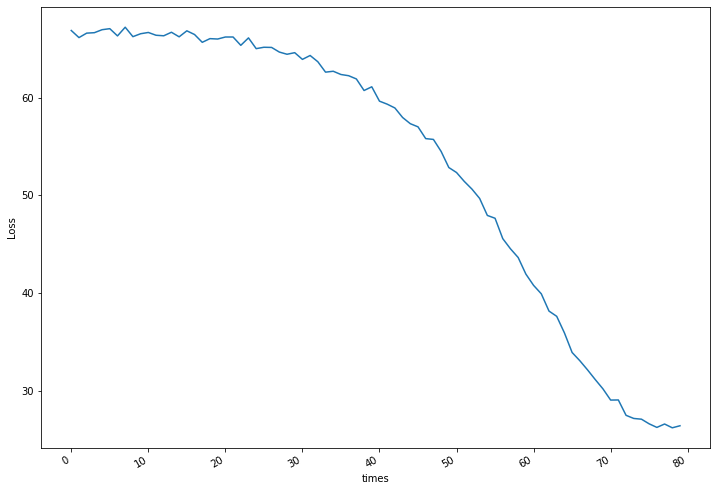

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,9))
loss_df = pd.DataFrame(loss_holder, columns=['time', 'loss'])
plt.ylabel("Loss")
plt.xlabel("times")
plt.plot(loss_df["loss"].values)
# x轴字体倾斜避免重叠
fig.autofmt_xdate()
plt.show()

## 人工神经网路

### 使用torch.nn.functional模块中的conv2d()方法

In [27]:
import torch.nn.functional as F


input = torch.randn(88, 66, 99, 33)
weight = torch.randn(19, 66, 7, 9)
bias = torch.empty(19).normal_()
output = F.conv2d(input, weight, bias)
output.size()

torch.Size([88, 19, 93, 25])

### 使用torch.nn.Conv2d类，该类对输入及输出进行了更明确的定义，但底层调用的仍然是torch.nn.functional模块中的conv2d()方法

In [28]:
input = torch.randn(88, 66, 99, 33)
conv2d = nn.Conv2d(in_channels=66, out_channels=19, kernel_size=(7, 9))
print(conv2d(input).size())

torch.Size([88, 19, 93, 25])


In [29]:
# 指定stride=3, padding=1
input = torch.randn(88, 66, 99, 33)
conv2d = nn.Conv2d(in_channels=66, out_channels=19, kernel_size=(7, 14), stride=3, padding=(2, 1))
print(conv2d(input).size())

torch.Size([88, 19, 33, 8])


In [30]:
# 指定stride=3, padding=1, dilation=2
input = torch.randn(88, 66, 99, 33)
conv2d = nn.Conv2d(in_channels=66, out_channels=19, kernel_size=(7, 14), stride=3, padding=1, dilation=2)
print(conv2d(input).size())

torch.Size([88, 19, 30, 3])


In [31]:
# 指定stride=3, padding=1, dilation=2, max pooling kernel size=(3, 2)
input = torch.randn(88, 66, 99, 33)
conv2d = nn.Conv2d(in_channels=66, out_channels=19, kernel_size=(7, 14), stride=3, padding=1, dilation=2)
maxpool = nn.MaxPool2d((3, 2))
print(conv2d(input).size())
print(maxpool(conv2d(input)).size())

torch.Size([88, 19, 30, 3])
torch.Size([88, 19, 10, 1])


## 实验室小试牛刀

In [32]:
class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=7)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(288, 100)
        self.fc2 = nn.Linear(100, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 288)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x, dim=1)

In [33]:
import argparse

parser = argparse.ArgumentParser(description='PyTorch MNIST')
parser.add_argument('--batch-size', type=int, default=64, metavar='N', 
                    help='input batch size for training (default: 64)')
parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N', 
                    help='input batch size for testing (default: 1000)')
parser.add_argument('--epochs', type=int, default=10, metavar='N', 
                    help='number of epochs to train (default: 10)')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR', 
                    help='learning rate (default: 0.01)')
parser.add_argument('--momentum', type=float, default=0.9, metavar='M', 
                    help='SGD momentum (default: 0.9)')
parser.add_argument('--seed', type=int, default=1, metavar='S', 
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N', 
                    help='how many batches to wait before logging training status')
parser.add_argument('--num-processes', type=int, default=6, metavar='N', 
                    help='how many training processes to use (default: 5)')
parser.add_argument('--cuda', action='store_true', default=True, 
                    help='enables CUDA training')

_StoreTrueAction(option_strings=['--cuda'], dest='cuda', nargs=0, const=True, default=True, type=None, choices=None, help='enables CUDA training', metavar=None)

In [34]:
parser.print_help()

usage: ipykernel_launcher.py [-h] [--batch-size N] [--test-batch-size N] [--epochs N] [--lr LR] [--momentum M] [--seed S] [--log-interval N] [--num-processes N] [--cuda]

PyTorch MNIST

optional arguments:
  -h, --help           show this help message and exit
  --batch-size N       input batch size for training (default: 64)
  --test-batch-size N  input batch size for testing (default: 1000)
  --epochs N           number of epochs to train (default: 10)
  --lr LR              learning rate (default: 0.01)
  --momentum M         SGD momentum (default: 0.9)
  --seed S             random seed (default: 1)
  --log-interval N     how many batches to wait before logging training status
  --num-processes N    how many training processes to use (default: 5)
  --cuda               enables CUDA training


In [35]:
!python3 mnist_classification_cnn.py  --epochs 2

9346	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305003
9344	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.292679
9345	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299233
9348	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.294538
9347	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293725
9364	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.290245
9346	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.152252
9348	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.418535
9345	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.140388
9344	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.298409
9364	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.287086
9347	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.081824
9348	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.112985
9346	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.127718
9345	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.032310
9344	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.110436
9364	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.194408
9347	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.137210
9348	Train Epoch: 1 [19200/60000 (32%)]	Loss: 

In [36]:
class CNN_Dilation_Net(nn.Module):
    def __init__(self):
        super(CNN_Dilation_Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=7, dilation=2)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(128, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x, dim=1)

In [37]:
!python3 mnist_classification_cnn.py  --epochs 2

9784	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303736
9803	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301841
9783	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300296
9785	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301580
9786	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.287154
9787	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296663
9784	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.380331
9803	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.582125
9786	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.386545
9785	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.352959
9783	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.600589
9787	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.610499
9784	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.041174
9785	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.140011
9787	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.114523
9786	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.087080
9803	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.229812
9783	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.161393
9784	Train Epoch: 1 [19200/60000 (32%)]	Loss: 

In [38]:
!python3 mnist_classification_cnn.py  --epochs 2  # 增加卷积核个数

10224	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302162
10241	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297329
10221	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299287
10225	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296701
10223	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.286875
10222	Train Epoch: 1 [0/60000 (0%)]	Loss: 2.287549
10224	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.111602
10221	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.366902
10241	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.352619
10222	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.118742
10225	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.333070
10223	Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.116763
10224	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.096862
10241	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.195847
10221	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.140162
10222	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.038990
10223	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.129450
10225	Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.094512
10224	Train Epoch: 1 [19200/

In [39]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Normalize, Resize


simple_transform = Compose([Resize((256, 256)), ToTensor(), 
                                      Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_data = ImageFolder('./DogVsCatData/train/', simple_transform)
print(train_data.class_to_idx)
print(train_data.classes)

{'cat': 0, 'dog': 1}
['cat', 'dog']


In [40]:
# 绘制图片
def imshow(inp, cmap=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = inp * std + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp, cmap)

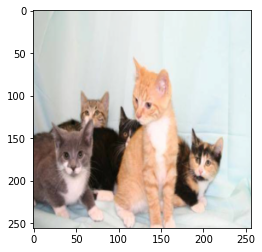

In [41]:
imshow(train_data[99][0])

In [42]:
class DogCat_Net(nn.Module):
    def __init__(self):
        super(DogCat_Net, self).__init__()
        # RGB对应的通道数为3，定义16个卷积核，卷积核大小为7，膨胀率为2
        self.conv1 = nn.Conv2d(3, 4, kernel_size=7, dilation=2)
        self.conv2 = nn.Conv2d(4, 16, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(55696, 1000)
        self.fc2 = nn.Linear(1000, 50)
        self.fc3 = nn.Linear(50, 2)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 55696)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.dropout(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [43]:
import torch.optim as optim
import os


def train(args, model, device, dataloader_kwargs):
    # 手动设置随机种子
    torch.manual_seed(args.get("seed"))
    # 加载训练数据
    train_loader = DataLoader(args.get("train_data"), batch_size=args.get("batch_size"), 
                              num_workers=6, shuffle=True, **dataloader_kwargs)
    
    # 使用随机梯度下降进行优化
    optimizer = optim.SGD(model.parameters(), lr=args.get("lr"), momentum=args.get("momentum"))
    # 开始训练，训练epoches次
    for epoch in range(1, args.get("epochs") + 1):
        train_epoch(epoch, args, model, device, train_loader, optimizer)


def train_epoch(epoch, args, model, device, data_loader, optimizer):
    # 模型转换为训练模式
    model.train()
    pid = os.getpid()
    for batch_idx, (data, target) in enumerate(data_loader):
        # 优化器梯度置0
        optimizer.zero_grad()
        # 输入特征预测值
        output = model(data.to(device))
        # 预测值与标准值计算损失
        loss = F.nll_loss(output, target.to(device))
        # 计算梯度
        loss.backward()
        # 更新梯度
        optimizer.step()
        # 每10步打印一下日志
        if batch_idx % 50 == 0:
            print('{}\tTrain Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.12f}'.format(
                pid, epoch, batch_idx * len(data), len(data_loader.dataset), 
                100. * batch_idx / len(data_loader), loss.item()))

In [44]:
# 超参数及默认值
args = {'batch_size': 128, 'test_batch_size': 1000, 'epochs': 10, 
        'lr': 0.01, 'momentum': 0.9, 'seed': 1, 'log_interval': 10, 'train_data': train_data}

use_cuda = True if torch.cuda.is_available() else False

if __name__ == '__main__':
    # 运行时设备
    device = torch.device("cuda" if use_cuda else "cpu")
    torch.cuda.empty_cache()
    # 使用固定缓冲区
    dataloader_kwargs = {'pin_memory': True}
    # 模型拷贝到设备
    model = DogCat_Net().to(device)
    train(args, model, device, dataloader_kwargs)

9172	Train Epoch: 1 [0/25000 (0.00%)]	Loss: 0.702147781849
9172	Train Epoch: 1 [6400/25000 (25.51%)]	Loss: 0.708428323269
9172	Train Epoch: 1 [12800/25000 (51.02%)]	Loss: 0.683151125908
9172	Train Epoch: 1 [19200/25000 (76.53%)]	Loss: 0.684495329857
9172	Train Epoch: 2 [0/25000 (0.00%)]	Loss: 0.664478957653
9172	Train Epoch: 2 [6400/25000 (25.51%)]	Loss: 0.653239488602
9172	Train Epoch: 2 [12800/25000 (51.02%)]	Loss: 0.649182677269
9172	Train Epoch: 2 [19200/25000 (76.53%)]	Loss: 0.660870075226
9172	Train Epoch: 3 [0/25000 (0.00%)]	Loss: 0.629029273987
9172	Train Epoch: 3 [6400/25000 (25.51%)]	Loss: 0.633510231972
9172	Train Epoch: 3 [12800/25000 (51.02%)]	Loss: 0.585844218731
9172	Train Epoch: 3 [19200/25000 (76.53%)]	Loss: 0.581932783127
9172	Train Epoch: 4 [0/25000 (0.00%)]	Loss: 0.615271329880
9172	Train Epoch: 4 [6400/25000 (25.51%)]	Loss: 0.569892048836
9172	Train Epoch: 4 [12800/25000 (51.02%)]	Loss: 0.586923003197
9172	Train Epoch: 4 [19200/25000 (76.53%)]	Loss: 0.583230197430


In [45]:
model

DogCat_Net(
  (conv1): Conv2d(3, 4, kernel_size=(7, 7), stride=(1, 1), dilation=(2, 2))
  (conv2): Conv2d(4, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=55696, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [46]:
# 封装和实现register_forward_hook()回调函数
class ActivationData():
    # 网络输出值
    outputs = None
    
    def __init__(self, layer):
        # 在模型的layer_num层上注册回调函数，并传入处理函数
        self.hook = layer.register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        self.outputs = output.cpu()
        
    def remove(self):
        # 由回调句柄调用， 用于将回调函数从网络层删除
        self.hook.remove()

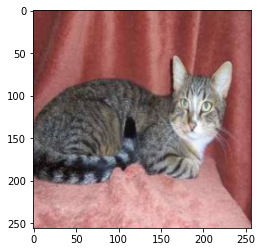

In [47]:
img = train_data[9][0]
imshow(img)

In [48]:
# 得到句柄
conv_out = ActivationData(model.conv2)
# 传入图片
o = model(img.unsqueeze(0).cuda(torch.device("cuda:0")))
# 移除回调函数
conv_out.remove()

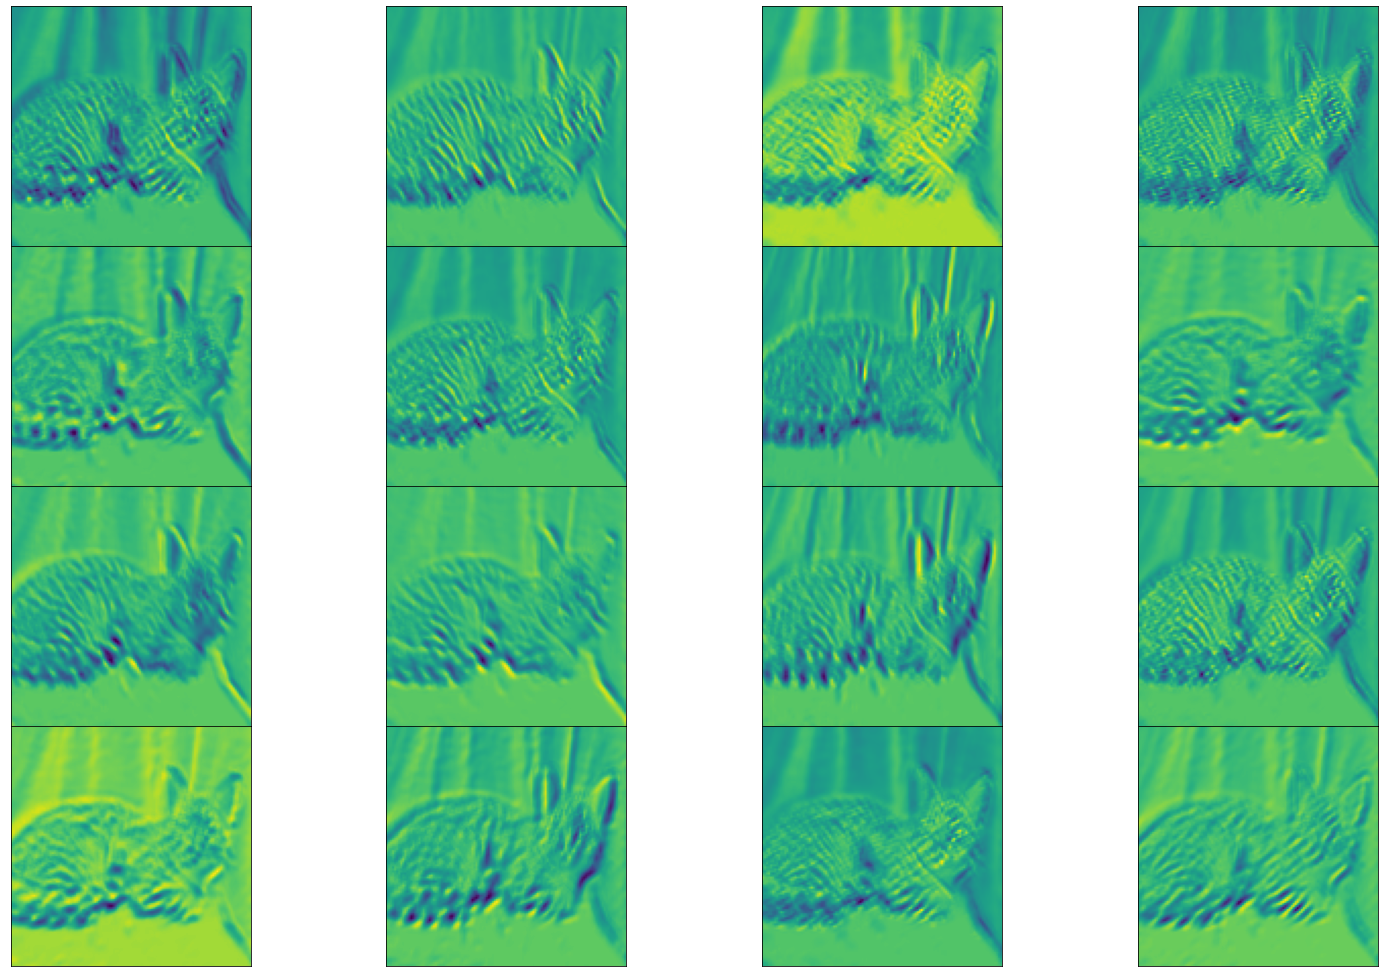

In [49]:
fig = plt.figure(figsize=[20, 50])
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)
for i in range(16):
    ax = fig.add_subplot(12, 4, i+1, xticks=[], yticks=[])
    ax.imshow(conv_out.outputs[0][i].detach().numpy())

In [50]:
# 查看第一个卷积层
conv_out1 = ActivationData(model.conv1)
# 传入图片
o = model(img.unsqueeze(0).cuda())
# 移除回调函数
conv_out1.remove()

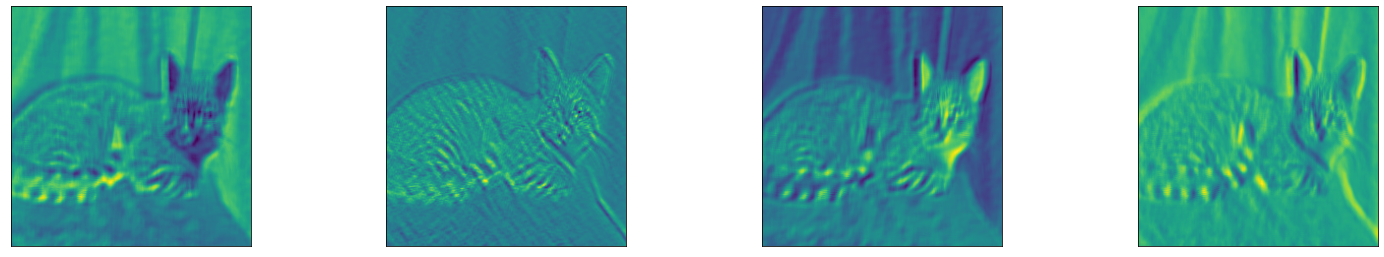

In [51]:
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)
for i in range(4):
    ax = fig.add_subplot(12, 4, i+1, xticks=[], yticks=[])
    ax.imshow(conv_out1.outputs[0][i].detach().numpy())

In [52]:
from torchvision import models


# VGG-16迁移学习
vgg16 = models.vgg16(pretrained=True).cuda()

In [53]:
for param in vgg16.features.parameters():
    param.requires_grad = False
# 微调网络
fc_features = vgg16.classifier[6].in_features
# 修改类别为2
vgg16.classifier[6].out_features = 2 
# !!!这是无法修改线性层的，因为out_features仅仅是属性而已，而Linear内部使用的仍然是以前的Storage
vgg16.classifier[6] = nn.Linear(fc_features, 2)
vgg16.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [54]:
def vgg_train(args, vgg, device, dataloader_kwargs):
    torch.manual_seed(args.get("seed") + 1)
    train_loader = DataLoader(args.get("train_data"), batch_size=args.get("batch_size"), num_workers=8, 
                              shuffle=True, **dataloader_kwargs)
    optimizer = optim.SGD(vgg.parameters(), lr=args.get("lr"), momentum=args.get("momentum"))
    for epoch in range(1, args.get("epochs") + 1):
        vgg_train_epoch(epoch, args, vgg, device, train_loader, optimizer)
        
        
def vgg_train_epoch(epoch, args, vgg, device, data_loader, optimizer):
    vgg.train()
    pid = os.getpid()
    for batch_idx, (data, target) in enumerate(data_loader):
        optimizer.zero_grad()
        output = F.log_softmax(vgg(data.to(device)), dim=1)
        loss = F.nll_loss(output.narrow(1, 0, 2), target.to(device))
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('{}\tTrain Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.12f}'.format(
                pid, epoch, batch_idx * len(data), len(data_loader.dataset), 
                100. * batch_idx / len(data_loader), loss.item()))

In [55]:
torch.cuda.empty_cache()
args={'batch_size': 32, 'epochs': 10, 'lr': 0.0001, 'momentum': 0.5, 'seed': 1, 'log_interval': 30, 
      'train_data': train_data}
use_cuda=True if torch.cuda.is_available() else False

if __name__=="__main__":
    # 运行时设备
    device = torch.device("cuda:0" if use_cuda else "cpu")
    vgg16 = models.vgg16(pretrained=True)
    
    # 冻结网络层
    for param in vgg16.features.parameters(): 
        param.requires_grad = False
    # 微调网络
    fc_features = vgg16.classifier[6].in_features  
    # 修改类别为2
    vgg16.classifier[6] = nn.Linear(fc_features, 2) 
    vgg16.cuda()
    # 使用固定缓冲区
    dataloader_kwargs = {'pin_memory': True} if use_cuda else {}
    vgg_train(args, vgg16, device, dataloader_kwargs)

9172	Train Epoch: 1 [0/25000 (0.00%)]	Loss: 0.804194152355
9172	Train Epoch: 1 [3200/25000 (12.79%)]	Loss: 0.271074414253
9172	Train Epoch: 1 [6400/25000 (25.58%)]	Loss: 0.108570873737
9172	Train Epoch: 1 [9600/25000 (38.36%)]	Loss: 0.157786071301
9172	Train Epoch: 1 [12800/25000 (51.15%)]	Loss: 0.081202775240
9172	Train Epoch: 1 [16000/25000 (63.94%)]	Loss: 0.135593041778
9172	Train Epoch: 1 [19200/25000 (76.73%)]	Loss: 0.073396041989
9172	Train Epoch: 1 [22400/25000 (89.51%)]	Loss: 0.075910553336
9172	Train Epoch: 2 [0/25000 (0.00%)]	Loss: 0.126244455576
9172	Train Epoch: 2 [3200/25000 (12.79%)]	Loss: 0.056617468596
9172	Train Epoch: 2 [6400/25000 (25.58%)]	Loss: 0.078367888927
9172	Train Epoch: 2 [9600/25000 (38.36%)]	Loss: 0.069016017020
9172	Train Epoch: 2 [12800/25000 (51.15%)]	Loss: 0.037805385888
9172	Train Epoch: 2 [16000/25000 (63.94%)]	Loss: 0.069207496941
9172	Train Epoch: 2 [19200/25000 (76.73%)]	Loss: 0.031833522022
9172	Train Epoch: 2 [22400/25000 (89.51%)]	Loss: 0.06352

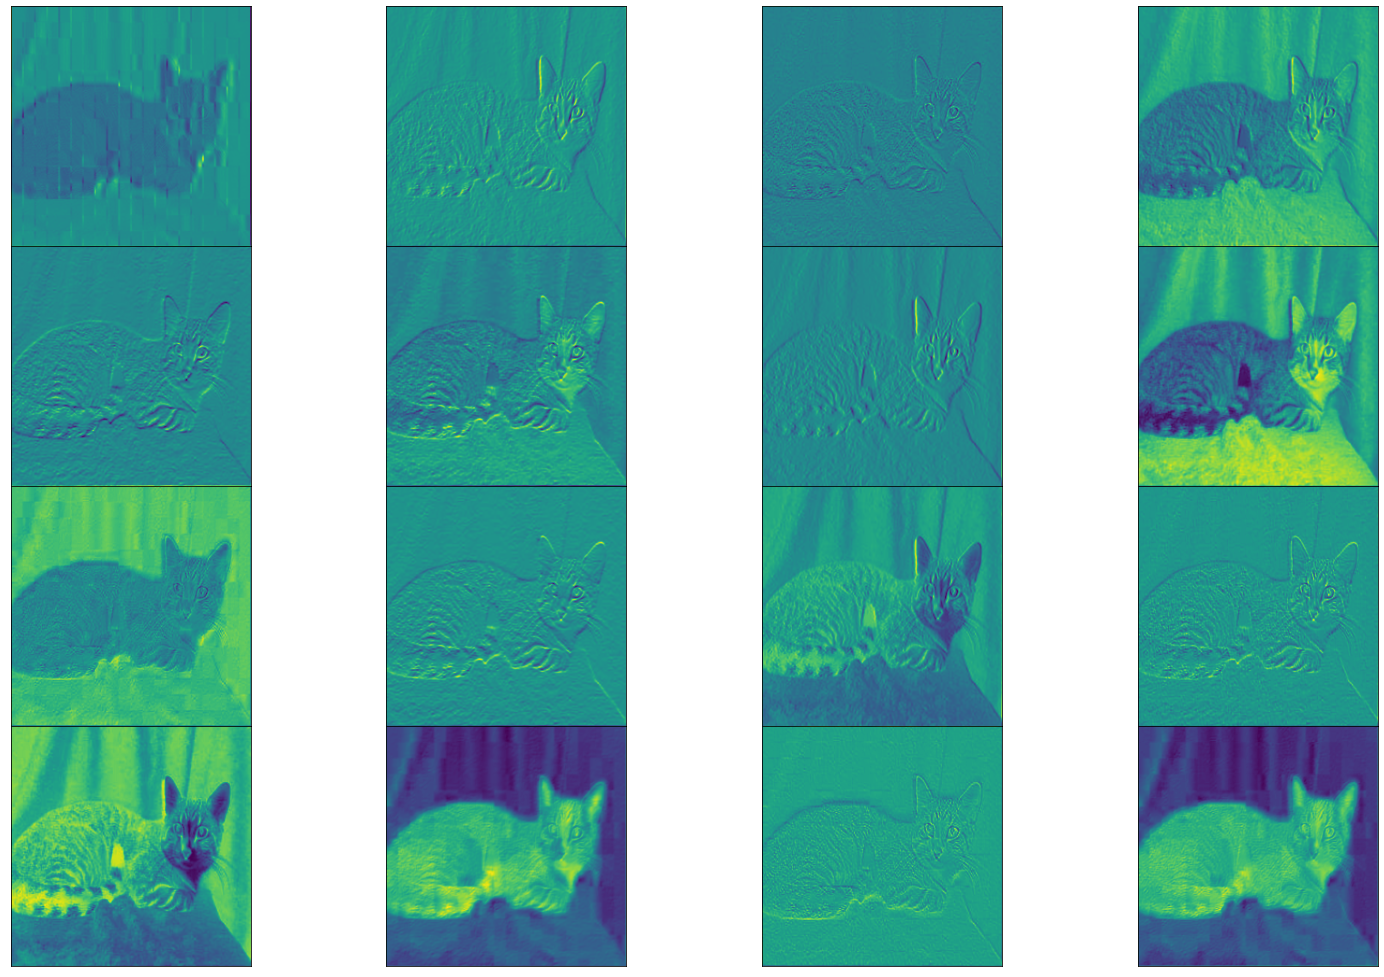

In [56]:
# 得到回调句柄
conv_out = ActivationData(vgg16.features[0])
# 传入图片
o = vgg16(img.unsqueeze(0).cuda())
# 移除注册的回调函数
conv_out.remove()
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(16):
    ax = fig.add_subplot(12,4,i+1,xticks=[],yticks=[])
    ax.imshow(conv_out.outputs[0][i].detach().numpy())

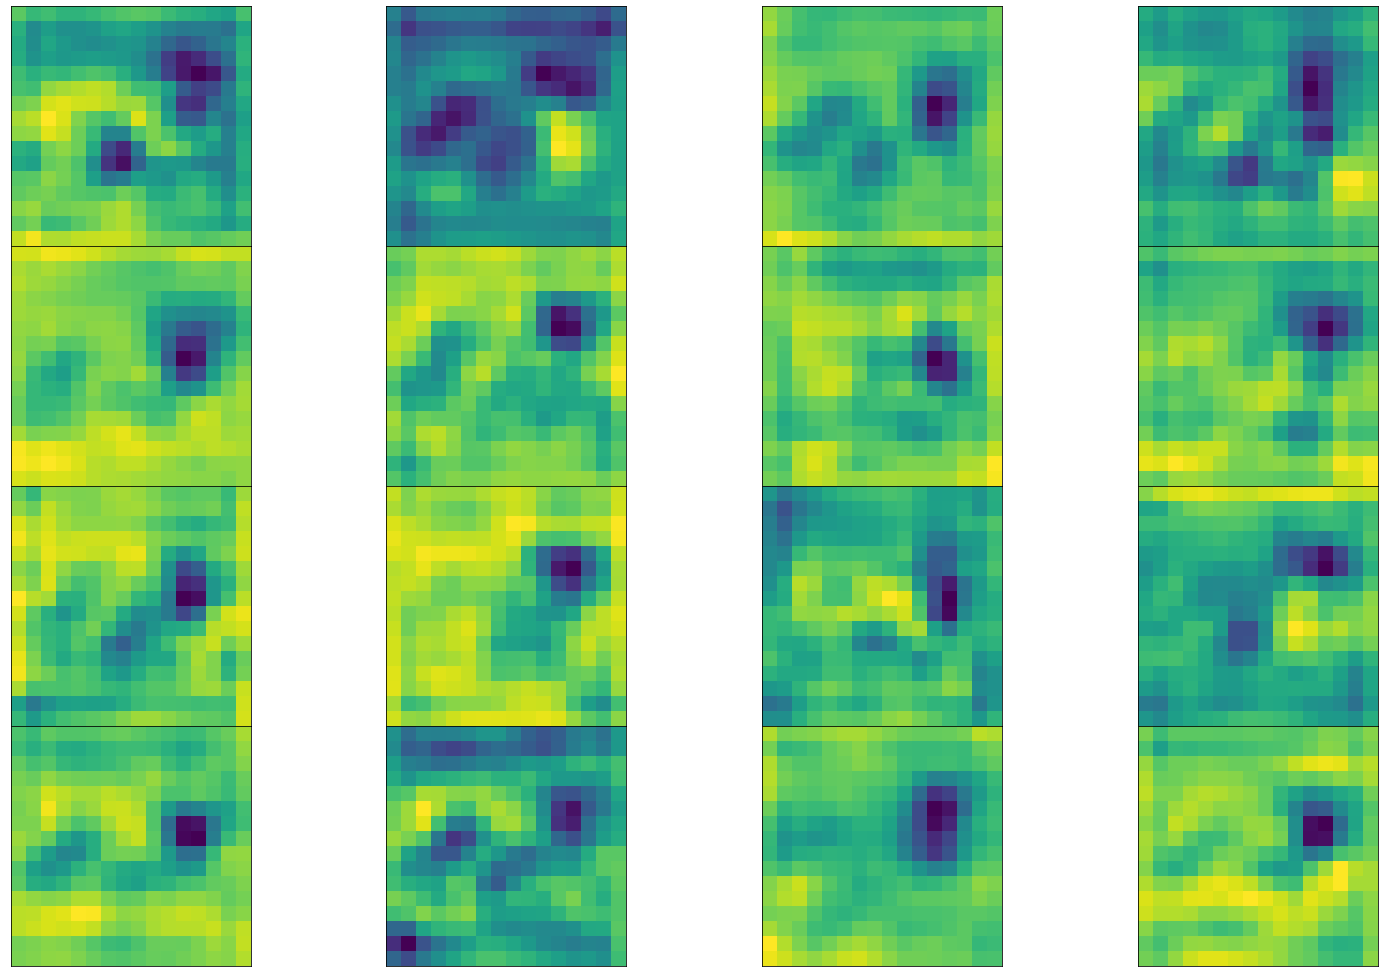

In [57]:
# 得到回调句柄
conv_out = ActivationData(vgg16.features[28])
# 传入图片
o = vgg16(img.unsqueeze(0).cuda())
# 移除注册的回调函数
conv_out.remove()
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(16):
    ax = fig.add_subplot(12,4,i+1,xticks=[],yticks=[])
    ax.imshow(conv_out.outputs[0][i].detach().numpy())

In [58]:
vgg16.state_dict().keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])

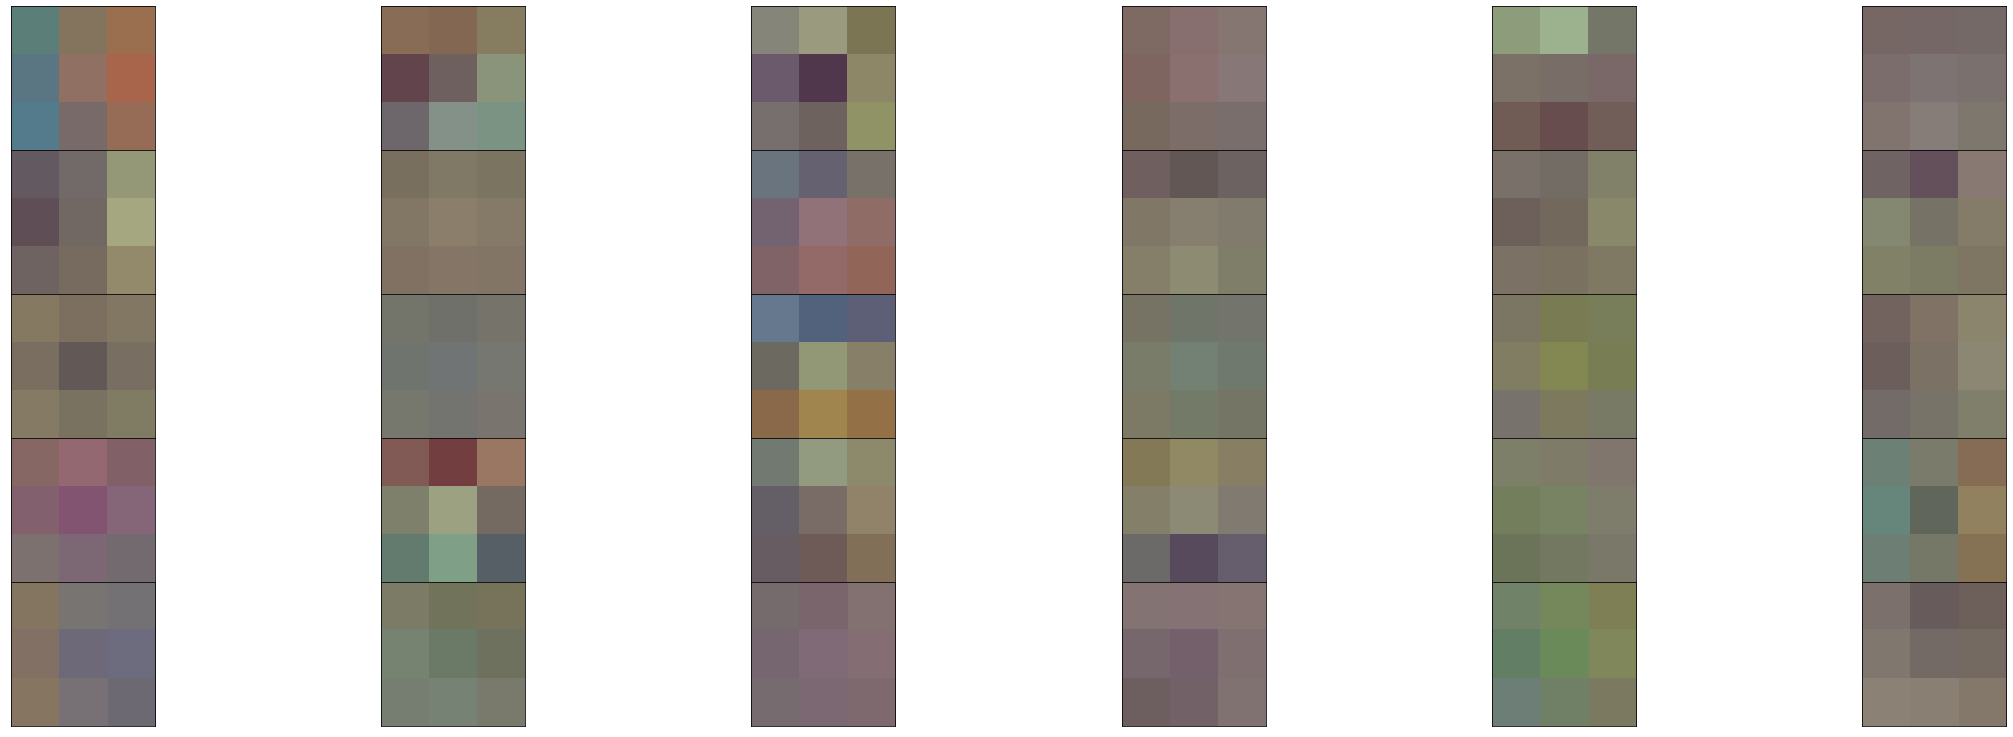

In [59]:
cnn_weights = vgg16.state_dict()['features.0.weight'].cpu()
fig = plt.figure(figsize=(30, 30))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)
for i in range(30):
    ax = fig.add_subplot(12, 6, i+1, xticks=[], yticks=[])
    imshow(cnn_weights[i])